# Intermediate Model Random Forest

In [115]:
import sys
print(sys.executable)
# https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

/Users/kata/opt/anaconda3/bin/python


In [163]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import asarray
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [117]:
import pandas as pd
series = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/calls.csv', header=0, index_col=0)
#df['date'] = pd.to_datetime(df['date'])
#df = df.drop(columns=['n_sick', 'n_duty', 'n_sby', 'sby_need', 'dafted'])
#df = df.set_index('date')

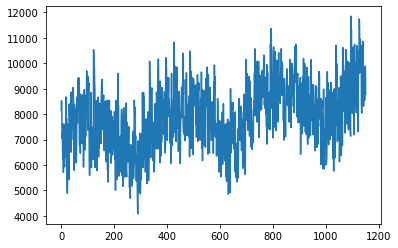

In [118]:
#series = read_csv('/Users/kata/Documents/Studium/Kurse/3. Semester/Model Engineering/use_case_2/sickness_table.csv', header=0, index_col=0)
values = series.values
# plot dataset
pyplot.plot(values)
pyplot.show()

In [14]:

# forecast monthly births with random forest


In [119]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [120]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]


In [121]:
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]


In [23]:
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	error2 = mean_squared_error(test[:, -1], predictions)
	return error, error2, test[:, -1], predictions
 

>expected=10524.0, predicted=8660.1
>expected=8316.0, predicted=9954.6
>expected=9102.0, predicted=8796.7
>expected=8664.0, predicted=8801.3
>expected=9480.0, predicted=8933.4
>expected=8544.0, predicted=8822.4
>expected=8814.0, predicted=8674.1
>expected=9846.0, predicted=8605.2
>expected=9882.0, predicted=8687.5
>expected=8790.0, predicted=9277.6
MAE: 783.281
MSE: 987119.522


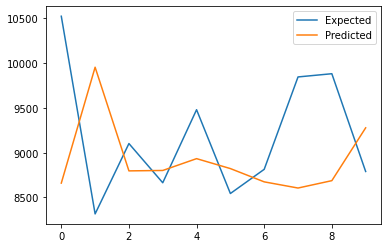

In [24]:

# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, mse, y, yhat = walk_forward_validation(data, 10)
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [20]:
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=6)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new prediction
row = values[-6:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))


Input: [9480 8544 8814 9846 9882 8790], Predicted: 8539.764


In [140]:
# zweiter Versuch
series = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/calls_RF.csv', header=0, index_col=0)

In [141]:
X = series.index.values.reshape(-1,1)
y = series.calls

In [142]:
# train test split
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]

In [143]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)


In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
regressor = RandomForestRegressor(n_estimators=2000, random_state=80)

In [146]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=2000)

In [161]:
y_pred = regressor.predict(x_test)

In [148]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


,Actual,Predicted
921,9870,9225.3
922,7896,9225.3
923,7302,9225.3
924,7506,9225.3
925,9318,9225.3
...,...,...
1147,8544,9225.3
1148,8814,9225.3
1149,9846,9225.3
1150,9882,9225.3


In [114]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1232.711987012987
Mean Squared Error: 2278023.6463168436
Root Mean Squared Error: 1509.3123090721958


ValueError: x and y must have same first dimension, but have shapes (1152, 1) and (920,)

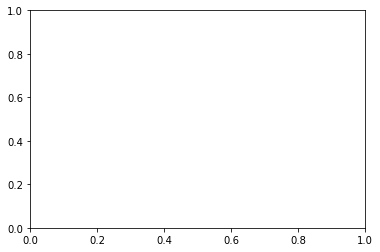

In [165]:
pyplot.plot(X, y[:920])
pyplot.plot(X, y_test)
pyplot.show()